In [17]:
import pandas as pd
import re
import string 
import matplotlib.pyplot as plt
import seaborn as sns

## READ in cleaned csv files

In [95]:
inf_clean_script =  pd.read_csv("infinity_war_script_clean.txt", index_col = 0)
end_clean_script = pd.read_csv("end_game_script_clean.txt", index_col = 0)

inf_word_count = pd.read_csv("infinity_war_word_count.csv", index_col = 0)
end_word_count = pd.read_csv("end_game_word_count.csv", index_col = 0)

## Create function for plotting the most frequent words for certain characters and their counts

In [141]:
def create_word_count_plot(character_name, char_present, colors):
    fig, axs = plt.subplots(2, 1, figsize = (8,8), sharex = True)

    fig.suptitle("Top 5 Most Frequent Words for {}".format(char_present), y = 1.05, size = 45)
    tony_inf_war = inf_word_count.loc[inf_word_count['character'] == character_name].sort_values(by = ['word_count']
                                                                          , ascending = False).head(5).sort_values(by = "word_count")
    tony_end_game = end_word_count.loc[end_word_count['character'] == character_name].sort_values(by = ['word_count']
                                                                            , ascending = False).head(5).sort_values(by = "word_count")
    plt.rc('xtick', labelsize=24) 
    plt.rc('ytick', labelsize=22) 

    axs[0].barh(tony_inf_war["word"], tony_inf_war['word_count'], color = colors[0])
    axs[0].set_title("Avengers: Infinity War", fontsize = 25)
    
    axs[1].barh(tony_end_game["word"], tony_end_game["word_count"], color = colors[1])
    axs[1].set_title("Avengers: End Game", fontsize = 25)
    
    fig.text(0.5, -0.05, 'Word Frequency', ha='center', size = 40)
    fig.text(-0.1, 0.5, 'Word Spoken', va='center', rotation='vertical', size = 40)


    fig.tight_layout(pad=0.75)
    plt.show()

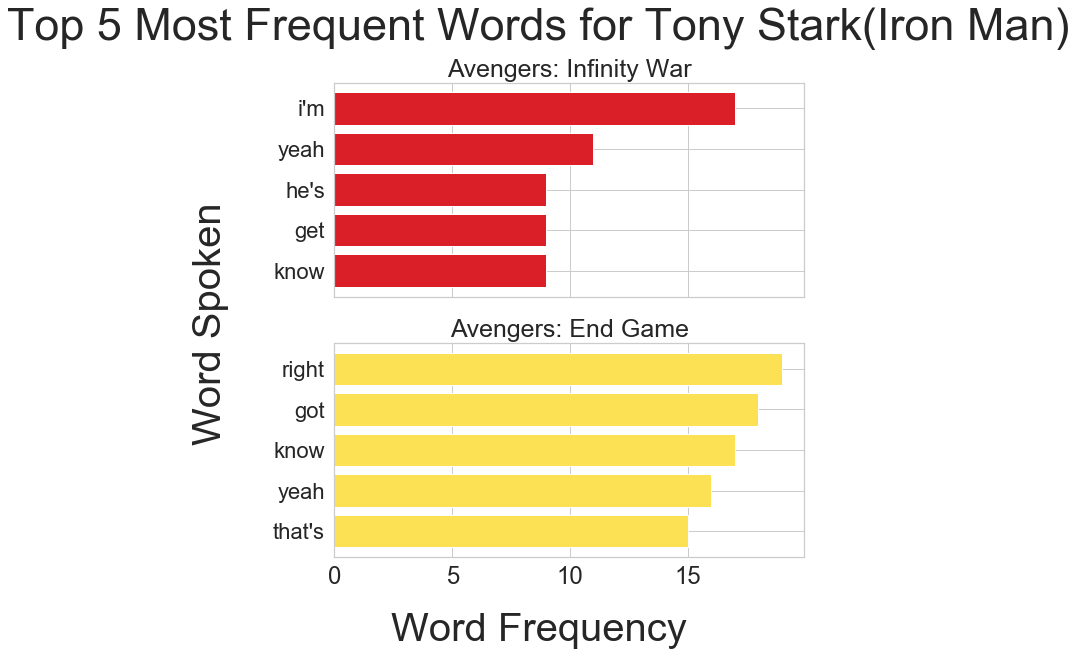

In [142]:
create_word_count_plot("TONY STARK", "Tony Stark(Iron Man)", ["#DA1F28","#FCE154"])

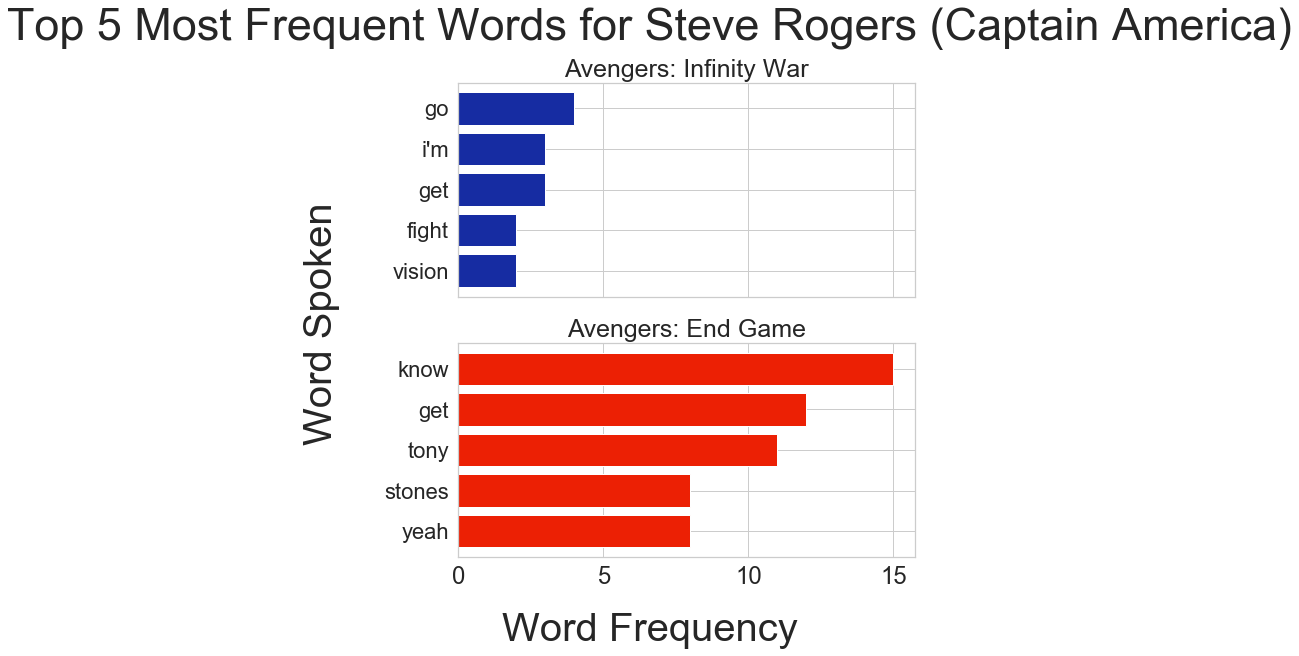

In [143]:
create_word_count_plot("STEVE ROGERS", "Steve Rogers (Captain America)", ["#162CA2","#EC2004"])

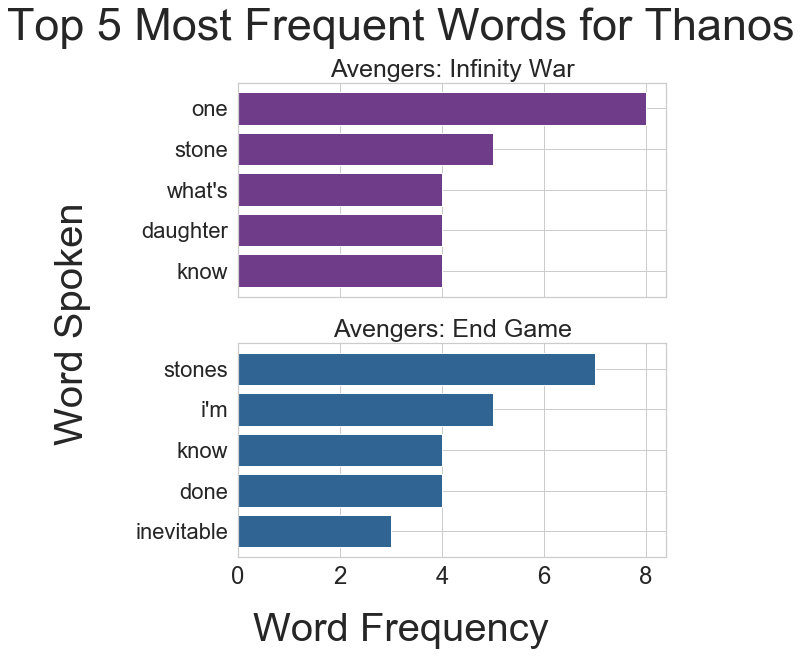

In [146]:
create_word_count_plot("THANOS", "Thanos", ["#6F3C89","#306493"])

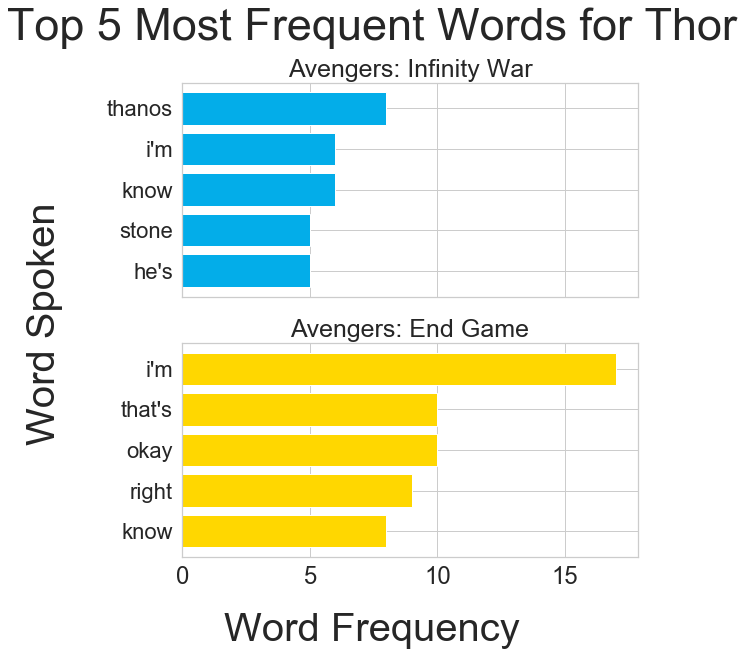

In [233]:
create_word_count_plot("THOR", "Thor", ["#03ADE9","Gold"])

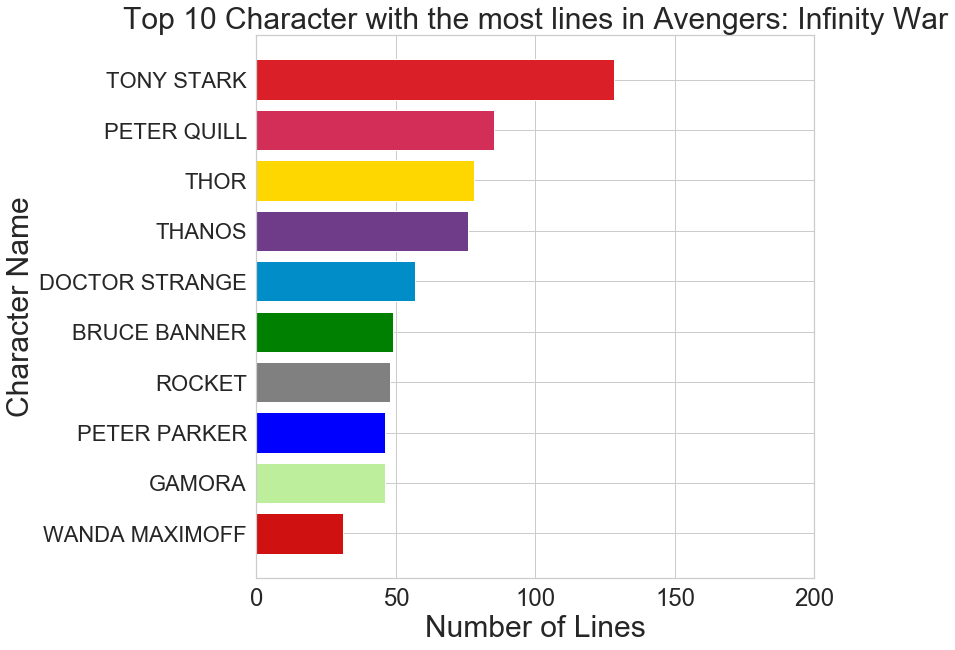

In [251]:
inf_war_line_count = inf_clean_script.groupby("character").count().reset_index().sort_values(by = ['line']
                                                                        , ascending = False).head(10).sort_values(by = "line")


char_colors = ["#d01111","#BDEE9C", "blue", "grey", "green","#008DC8", "#6F3C89", "gold", "#d22e57", "#DA1F28"]

fig, axs = plt.subplots(1, 1, figsize = (10,10))
plt.xlim(0,200)

plt.title("Top 10 Character with the most lines in Avengers: Infinity War", size = 30)
axs.barh(inf_war_line_count["character"], inf_war_line_count["line"]
         , color = char_colors)
plt.xlabel("Number of Lines")
plt.ylabel("Character Name")
plt.show()


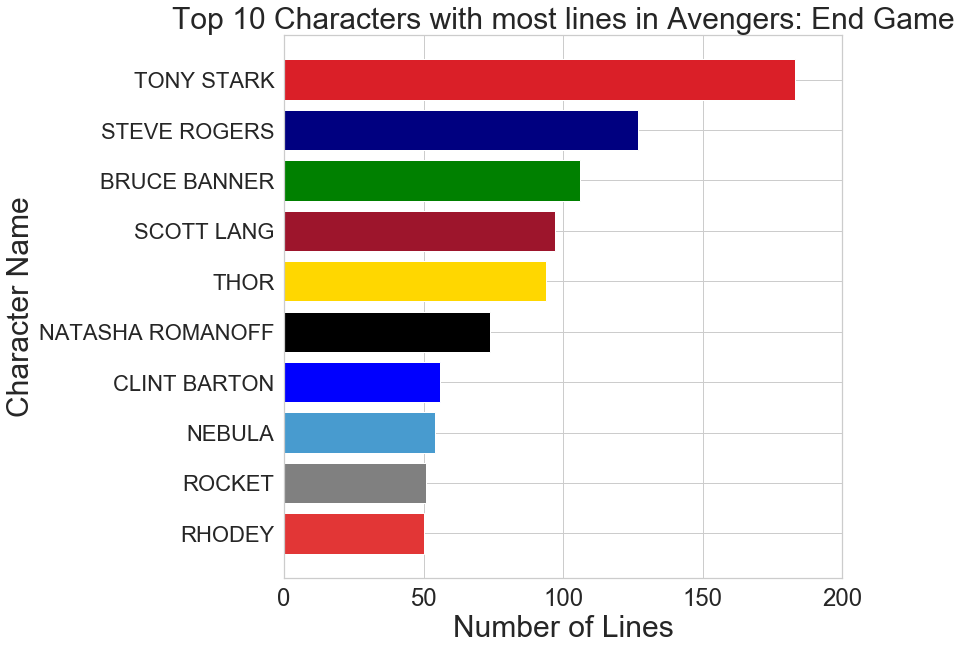

In [252]:
end_game_line_count = end_line_count = end_clean_script.groupby("character").count().reset_index().sort_values(by = ['line']
                                                                        , ascending = False).head(10).sort_values(by = "line")
char_color2 = ["#e23636","grey","#489BCF","blue","black","gold", "#9D152C","green","Navy","#DA1F28"]

fig, axs = plt.subplots(1, 1, figsize = (10,10))

plt.xlim(0,200)
plt.title("Top 10 Characters with most lines in Avengers: End Game", size = 30)
axs.barh(end_line_count["character"], end_line_count["line"], color = char_color2)
plt.xlabel("Number of Lines")
plt.ylabel("Character Name")
plt.show()

In [179]:
total_inf_word_count = inf_word_count.groupby("character").sum().sort_values(by = ['word_count'], ascending = False).head(15)
total_end_word_count = end_word_count.groupby("character").sum().sort_values(by = ['word_count'], ascending = False).head(15)
